# This jupyter notebook analyzes customer data from the company Telco. There is also a model starting on In [41], which predictes the total charges a Telco customer could pay. The model is 92% accurate. 

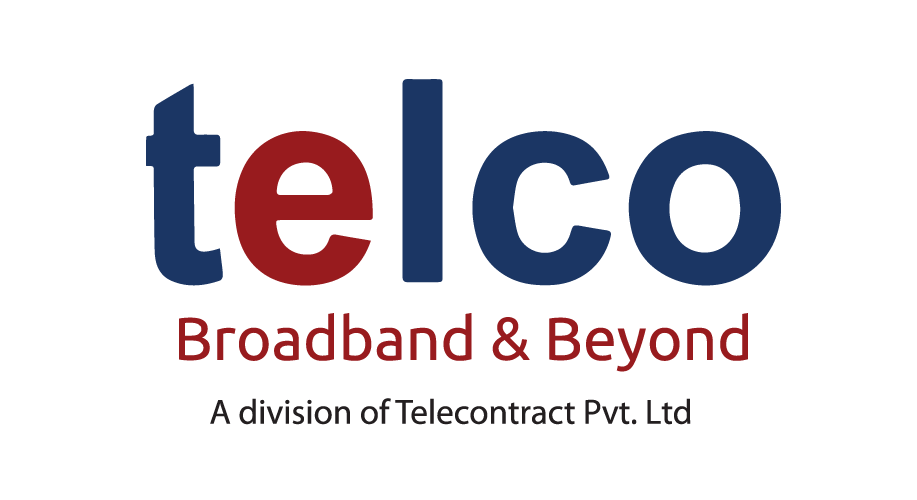

In [1]:
from IPython.display import Image
Image(filename='telco.png', width = 500, height = 200)

In [2]:
# KEY TAKEAWAYS

# 7,043 Telco customers.
# Telco customers pay on average $64.76 per month.
# Customers who paid using paperless billing, paid 40 - 44% more than customers who paid through the mail.
# These same customers also had slightly longer tenures with Telco.
# Month to month contract plans were the most popular amongst Telco customers.
# Approximately 27% or 1 in 4 customers stopped subscribing to Telco services from the previous month.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import statsmodels.api as sm

In [5]:
# Churn = customers who left within the last month
# For SeniorCitizen column, 1 = yes and 0 = no.
# Partner refers to whether a person is single or not.
# Tenure = Number of months someone has been a customer with Telco.

df = pd.read_csv('Telco_Customers.csv', header=0,encoding = 'unicode_escape')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# No missing values.
# 7,043 Telco customers.
# Telco customers pay on average $64.76 per month. 
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3955-JBZZM,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# TotalCharges column has blank spaces. 
df.sort_values('TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [9]:
# Replacing the blank spaces in the TotalCharges column with nan.
df2 = df.replace(r'^\s*$', np.nan, regex=True)
df2.sort_values('TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
105,6180-YBIQI,Male,0,No,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.30,100.2,No
4459,3178-FESZO,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.25,100.25,Yes
1723,2587-YNLES,Female,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,100.35,No
2124,7802-EFKNY,Male,0,Yes,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.95,100.4,Yes
2208,7216-EWTRS,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,100.8,Yes
460,4719-UMSIY,Male,0,No,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,100.9,No
3883,8104-OSKWT,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.80,1001.2,No
2799,7009-PCARS,Male,0,No,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.10,1001.5,No
5337,6705-LNMDD,Male,0,No,No,20,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Mailed check,50.00,1003.05,No
3644,8219-VYBVI,Male,0,No,Yes,39,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.00,1004.35,No


# Demographic Information

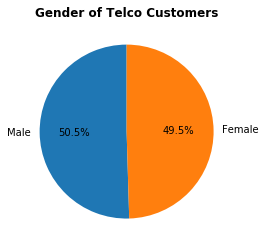

In [10]:
# Slightly more male customers than female customers.

gender_count = df['gender'].value_counts()
gender = ['Male', 'Female']
plt.pie(gender_count, labels=gender, startangle=90, autopct='%.1f%%')
plt.title('Gender of Telco Customers', fontweight = 'bold')
plt.show()

In [11]:
# Duplicating the partner column.
df2['Partner_Values'] = df['Partner']

# Replacing "yes" values in Partner column with "In a Relationship" 
# and "No" values in Partner column with "Single".
df2.replace(to_replace={'Partner_Values': {'Yes': 'In a Relationship', 'No': 'Single'}}, inplace=True)

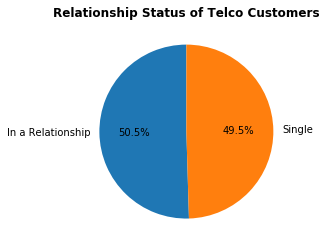

In [12]:
# Slightly more Telco customers are in a relationship. 
partner_count = df2['Partner_Values'].value_counts()
partner_count = ['In a Relationship', 'Single']
plt.pie(gender_count, labels=partner_count, startangle=90, autopct='%.1f%%')
plt.title('Relationship Status of Telco Customers', fontweight = 'bold')
plt.show()

In [13]:
# Duplicating SeniorCitizen column and renaming it SeniorCitizen_Values.
df2['SeniorCitizen_Values'] = df['SeniorCitizen']

# Replacing 1 with Yes and 0 with No in SeniorCitizen_Values column.
df2.replace(to_replace={'SeniorCitizen_Values': {1: 'Yes', 0: 'No'}}, inplace=True)

Text(0.5, 0, 'Senior Citizen Status')

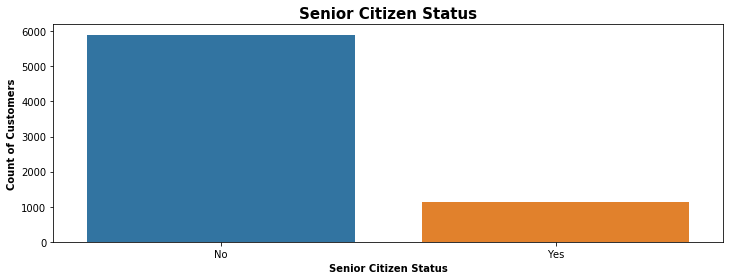

In [14]:
# Majority of Telco customers are not senior citizens.
plt.subplots(figsize=(12,4))
sns.countplot(x='SeniorCitizen_Values', data=df2)
plt.title('Senior Citizen Status', fontweight = 'bold', fontsize=15)
plt.ylabel('Count of Customers', fontweight='bold')
plt.xlabel('Senior Citizen Status', fontweight='bold')

Text(0.5, 0, 'Family or No Family')

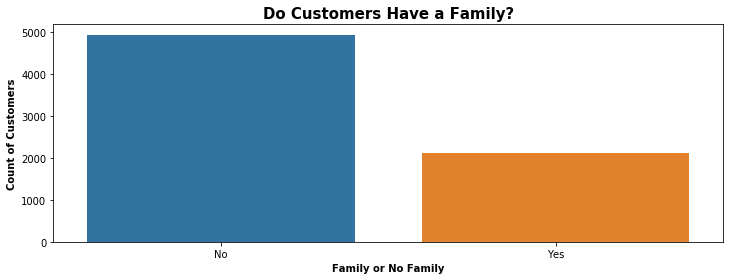

In [15]:
# Will make the assumption that dependents means having a family (i.e. children, parents to look after, etc).
# Majority of Telco customers don't have families like children. 

plt.subplots(figsize=(12,4))
sns.countplot(x='Dependents', data=df2)
plt.title('Do Customers Have a Family?', fontweight = 'bold', fontsize=15)
plt.ylabel('Count of Customers', fontweight='bold')
plt.xlabel('Family or No Family', fontweight='bold')

# Services That Customers Have Signed up For

Text(0.5, 0, 'Contract Type')

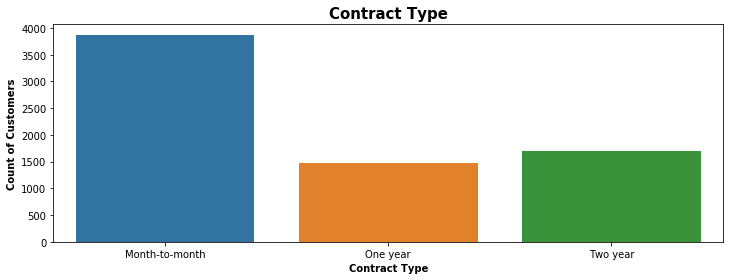

In [16]:
# Month to month contract plans were the most popular amongst Telco customers.
# Two year contract types were slightly more popular than one year contract types.

plt.subplots(figsize=(12,4))
sns.countplot(x='Contract', data=df2)
plt.title('Contract Type', fontweight = 'bold', fontsize=15)
plt.ylabel('Count of Customers', fontweight='bold')
plt.xlabel('Contract Type', fontweight='bold')

In [17]:
# Customers who had two year contract plans spent the most money at $3,728.92.
# Customers who had month to month contract plans spent the least money at $1,369.25.

df2.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges
Contract,,,
Month-to-month,0.208258,18.036645,66.398490
One year,0.128988,42.044807,65.048608
Two year,0.085546,56.735103,60.770413


In [19]:
df2.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges
Contract,,,
Month-to-month,0.208258,18.036645,66.398490
One year,0.128988,42.044807,65.048608
Two year,0.085546,56.735103,60.770413


In [20]:
# Customers who paid using paperless billing, had monthly charges that were 44% more than customers who paid through the mail.
# Customers who paid using paperless billing had total charges that were 40% more than customers who paid through the mail.
# These same customers also had slightly longer tenures with Telco.

df2.groupby('PaperlessBilling').mean()

,SeniorCitizen,tenure,MonthlyCharges
PaperlessBilling,,,
No,0.092618,32.189067,51.992967
Yes,0.210022,32.496524,73.553776


Text(0.5, 0, 'Phone Subscription Status')

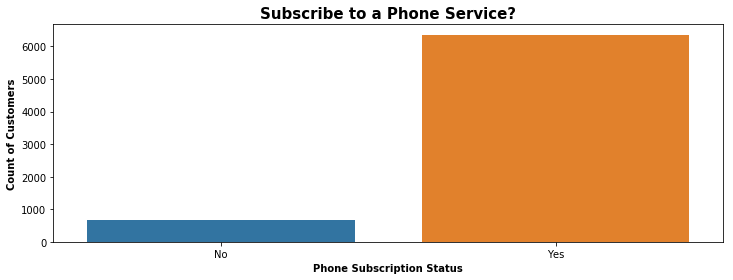

In [21]:
plt.subplots(figsize=(12,4))
sns.countplot(x='PhoneService', data=df2)
plt.title('Subscribe to a Phone Service?', fontweight = 'bold', fontsize=15)
plt.ylabel('Count of Customers', fontweight='bold')
plt.xlabel('Phone Subscription Status', fontweight='bold')

Text(0.5, 0, 'Internet Service Type')

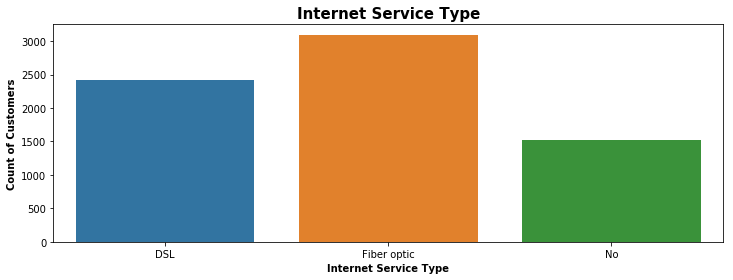

In [22]:
# Fiber optic is the most popular phone service for customers, followed by DSL. 
plt.subplots(figsize=(12,4))
sns.countplot(x='InternetService', data=df2)
plt.title('Internet Service Type', fontweight = 'bold', fontsize=15)
plt.ylabel('Count of Customers', fontweight='bold')
plt.xlabel('Internet Service Type', fontweight='bold')

In [23]:
# Changing data type of TotalCharges from a string to a float. 
df2['TotalCharges'] = df2.TotalCharges.astype('float')

In [24]:
# Customers who subscribed for fiber optics spent $33.40 more per month then customers who subscribed to DSL and almost $1,100 
# in total charges.
df2.groupby('InternetService').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
InternetService,,,,
DSL,0.106981,32.821561,58.102169,2119.789259
Fiber optic,0.268411,32.917959,91.500129,3205.304570
No,0.034076,30.547182,21.079194,665.220329


In [25]:
df2['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

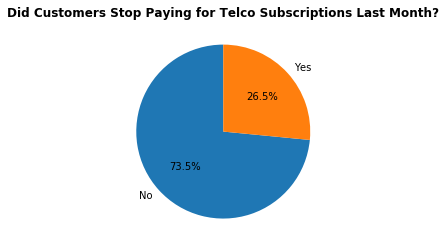

In [26]:
# Majority of Telco customers kept subscribing to Telco services from last month.
# Approximately 27% or 1 in 4 customers stopped subscribing to Telco services from last month.
churn_count = df2['Churn'].value_counts()
plt.pie(churn_count, labels=['No', 'Yes'], startangle=90, autopct='%.1f%%')
plt.title('Did Customers Stop Paying for Telco Subscriptions Last Month?', fontweight = 'bold')
plt.show()

# Model for total charges a Telco customer could pay. Model is 92% accurate in predicting total charges a Telco customer could pay. Charges can be seen as the revenue Telco makes from these customers.

In [41]:
from sklearn.linear_model import LinearRegression

In [27]:
df2.sort_values('TotalCharges', ascending=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_Values,SeniorCitizen_Values
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No,In a Relationship,No
6489,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes,Single,No
1151,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No,Single,No
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No,Single,No
583,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No,In a Relationship,No
1733,1015-OWJKI,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,19.05,No,Single,No
3110,6569-KTMDU,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.10,No,Single,No
4348,6121-VZNQB,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,19.10,Yes,Single,No
5336,9441-QHEVC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.10,No,Single,No
367,7302-ZHMHP,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No,Single,No


In [28]:
df3 = df2.dropna()
df3.sort_values('TotalCharges', ascending=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Partner_Values,SeniorCitizen_Values
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,18.80,18.80,No,In a Relationship,No
6489,9318-NKNFC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,18.85,18.85,Yes,Single,No
1151,8992-CEUEN,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Electronic check,18.85,18.85,No,Single,No
4939,9975-SKRNR,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.90,No,Single,No
583,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.00,19.00,No,In a Relationship,No
1733,1015-OWJKI,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,19.05,No,Single,No
3110,6569-KTMDU,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.10,No,Single,No
4348,6121-VZNQB,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,19.10,Yes,Single,No
5336,9441-QHEVC,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.10,19.10,No,Single,No
367,7302-ZHMHP,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.15,19.15,No,Single,No


In [29]:
# Duplicating gender column and renaming it Gender_Values.
df3['Gender_Dummy'] = df3['gender']

# Replacing Male with 1 and Female with 0.
df3.replace(to_replace={'Gender_Dummy': {'Male': 1, 'Female': 0}}, inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Yash\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
# Duplicating PhoneService column and renaming it PhoneService_Dummy.
df3['PhoneService_Dummy'] = df3['PhoneService']

# Replacing Yes with 1 and No with 0.
df3.replace(to_replace={'PhoneService_Dummy': {'Yes': 1, 'No': 0}}, inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [31]:
# Duplicating InternetService column and renaming it InternetService_Dummy.
df3['InternetService_Dummy'] = df3['InternetService']

# Replacing Yes with 1 and No with 0.
df3.replace(to_replace={'InternetService_Dummy': {'Fiber optic': 1, 'DSL': 2, 'No':0}}, inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
# Duplicating MultipleLines column and renaming it MultipleLines_Dummy.
df3['MultipleLines_Dummy'] = df3['MultipleLines']

# Replacing No with 1, Yes with 2, and No phone service with 0.
df3.replace(to_replace={'MultipleLines_Dummy': {'No': 1, 
                                                'Yes': 2, 
                                                'No phone service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
# Duplicating MultipleLines column and renaming it MultipleLines_Dummy.
df3['OnlineSecurity_Dummy'] = df3['OnlineSecurity']

# Replacing No with 1, Yes with 2, and No internet service with 0.
df3.replace(to_replace={'OnlineSecurity_Dummy': {'No': 1, 
                                                'Yes': 2, 
                                                'No internet service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
# Duplicating OnlineBackup column and renaming it OnlineBackup_Dummy.
df3['OnlineBackup_Dummy'] = df3['OnlineBackup']

# Replacing No with 1, Yes with 2, and No internet service with 0.
df3.replace(to_replace={'OnlineBackup_Dummy': {'No': 1, 
                                                'Yes': 2, 
                                                'No internet service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [35]:
# Duplicating DeviceProtection column and renaming it DeviceProtection_Dummy.
df3['DeviceProtection_Dummy'] = df3['DeviceProtection']

# Replacing No with 1, Yes with 2, and No internet service with 0.
df3.replace(to_replace={'DeviceProtection_Dummy': {'No': 1, 
                                                   'Yes': 2, 
                                                   'No internet service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
# Duplicating TechSupport column and renaming it TechSupport_Dummy.
df3['TechSupport_Dummy'] = df3['TechSupport']

# Replacing No with 1, Yes with 2, and No internet service with 0.
df3.replace(to_replace={'TechSupport_Dummy': {'No': 1, 
                                                   'Yes': 2, 
                                                   'No internet service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
# Duplicating StreamingTV column and renaming it StreamingTV_Dummy.
df3['StreamingTV_Dummy'] = df3['StreamingTV']

# Replacing No with 1, Yes with 2, and No internet service with 0.
df3.replace(to_replace={'StreamingTV_Dummy': {'No': 1, 
                                                   'Yes': 2, 
                                                   'No internet service': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
# Duplicating Contract column and renaming it Contract_Dummy.
df3['Contract_Dummy'] = df3['Contract']

# Replacing Month-to-month with 1, Two year with 2, and One year internet service with 0.
df3.replace(to_replace={'Contract_Dummy': {'Month-to-month': 1, 
                                                   'Two year': 2, 
                                                   'One year': 0}}
            ,inplace=True)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Yash\Anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [50]:
# MODEL IS 92% ACCURATE.

# Gender, payment method, and partner values have p-values that are too high, so they can't be used.

# PhoneService_Dummy, Yes = 1 and No = 0.
# InternetService_Dummy, Fiber optic = 1, DSL = 2, No = 0.
# Contract_Dummy, Month-to-month = 1, Two year = 2, One year = 0.
# MultipleLines_Dummy, No = 1, Yes = 2, and No phone service = 0.
# OnlineSecurity_Dummy, No = 1, Yes = 2, and No internet service = 0.
# DeviceProtection_Dummy, No = 1, Yes = 2, and No internet service = 0.
# TechSupport_Dummy, No = 1, Yes = 2, and No internet service = 0.
# StreamingTV_Dummy, No = 1, Yes = 2, and No internet service = 0.
# Contract_Dummy, Month-to-month = 1, Two year = 2, and One year internet service = 0

y = df3['TotalCharges']
x1 = df3[['tenure', 
          'SeniorCitizen', 
          'PhoneService_Dummy', 
          'InternetService_Dummy',
          'MultipleLines_Dummy',
          'OnlineSecurity_Dummy',
          'OnlineBackup_Dummy',
          'DeviceProtection_Dummy',
          'TechSupport_Dummy',
          'Contract_Dummy']]

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     5518.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:52:32   Log-Likelihood:                -56637.
No. Observations:                7032   AIC:                         1.133e+05
Df Residuals:                    7021   BIC:                         1.134e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1639.4288     44.313    -36.997      0.000   -1726.296   -1552.562
tenure                    59.5589      0.429    138.929      0.000      58.719      60.399
SeniorCitizen             60.4835     25.295      2.391      0.017      10.898     110.069
PhoneService_Dummy       240.5766     46.105      5.218      0.000     150.198     330.956
InternetService_Dummy   -896.2186     22.870    -39.187      0.000    -941.051    -851.386
MultipleLines_Dummy      346.9058     21.409     16.204      0.000     304.938     388.873
OnlineSecurity_Dummy     443.9628     22.592     19.651      0.000     399.675     488.250
OnlineBackup_Dummy       576.0604     20.513     28.083      0.000     535.850     616.271
DeviceProtection_Dummy   640.0844     20.630     31.027      0.000     599.643     680.526
TechSupport_Dummy        537.4919     22.914     23.457      0.000     492.574     582.410
Contract_Dummy          -105.9940     14.106     -7.514      0.000    -133.646     -78.342
==============================================================================
Omnibus:                      161.509   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.334
Skew:                           0.028   Prob(JB):                     4.86e-19
Kurtosis:                       2.467   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
df3[df3['customerID'] == '1452-KIOVK']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,SeniorCitizen_Values,Gender_Dummy,PhoneService_Dummy,InternetService_Dummy,MultipleLines_Dummy,OnlineSecurity_Dummy,OnlineBackup_Dummy,DeviceProtection_Dummy,TechSupport_Dummy,StreamingTV_Dummy
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,1,1,1,2,1,2,1,1,2


In [44]:
df3[df3['customerID'] == '1452-KIOVK']['TotalCharges']

6    1949.4
Name: TotalCharges, dtype: float64

In [51]:
# For SeniorCitizen column, 1 = yes and 0 = no.
# PhoneService_Dummy, Yes = 1 and No = 0.
# InternetService_Dummy, Fiber optic = 1, DSL = 2, No = 0.
# Contract_Dummy, Month-to-month = 1, Two year = 2, One year = 0.
# MultipleLines_Dummy, No = 1, Yes = 2, and No phone service = 0.
# OnlineSecurity_Dummy, No = 1, Yes = 2, and No internet service = 0.
# DeviceProtection_Dummy, No = 1, Yes = 2, and No internet service = 0.
# TechSupport_Dummy, No = 1, Yes = 2, and No internet service = 0.
# StreamingTV_Dummy, No = 1, Yes = 2, and No internet service = 0.

-1639.4288 + (59.5589*22) + 240.5766 - 896.2186 + (346.9058*2) + 443.9628 + 576.0604 + 640.0844 + 537.4919 - 105.9940

1800.6421000000003

In [52]:
# Actual total charges for customer 1452-KIOVK = $1,949.40
# Predicted total charges for customer 1452-KIOVK = $1,800.64
# Accuracy = 92%
1800.64 / 1949.40

0.923689340309839